In [1]:
from utils import *

In [2]:
# Setup API
import requests
from requests.compat import urljoin
import json
from time import perf_counter_ns

In [3]:
api_host = "http://localhost"
boxes_endpoint = "boxes/"

boxes_url = urljoin(api_host, boxes_endpoint)
response = requests.get(url=boxes_url)
response.json()[:1]

[{'x_min': 75.0,
  'x_max': 83.0,
  'y_min': 36.0,
  'y_max': 65.0,
  'z_min': 48.0,
  'z_max': 70.0,
  'id': '79147250-1865-42f0-b28c-82d6131c5052'}]

In [4]:

# for box in boxes:
#     data = {
#         "x_min": min(box[0]),
#         "x_max": max(box[0]),
#         "y_min": min(box[1]),
#         "y_max": max(box[1]),
#         "z_min": min(box[2]),
#         "z_max": max(box[2]),
#     }
#     for key, value in data.items():
#         data[key] = int(value)
#     print(data)
#     response = requests.post(urljoin(api_host, boxes_endpoint), json=data)
#     assert response.status_code == 200, response.json()

In [26]:
def show_3d_boxes(boxes):
    fig = go.Figure()

    for box in boxes:
        add_mesh_3d(fig, box)

    fig.update_layout(
        scene = {
            "xaxis": {
                "nticks": 4, 
                "range": [0,1000],
            },
            "yaxis": {
                "nticks": 4, 
                "range": [0, 1000],
            },
            "zaxis": {
                "nticks": 4, 
                "range": [0,1000],
            },
            "aspectmode": "cube"
        },
        width=700,
        margin=dict(r=20, l=10, b=10, t=10),
    )

    fig.show()

In [6]:
response = requests.get(f"{boxes_url}?x=20&y=500")

In [7]:
from typing import Dict, Any

def convert_box_json_to_nparray(box_obj: Dict[str, Any]):
    del box_obj["id"]
    box_array = get_box_points_array(
        **box_obj
    )
    return box_array

# convert_box_json_to_nparray(response.json()[0])

In [8]:
response_boxes = [convert_box_json_to_nparray(box) for box in response.json()]
response_boxes[:2]

[array([[  9.,   9.,  48.,  48.,   9.,   9.,  48.,  48.],
        [504., 545., 545., 504., 504., 545., 545., 504.],
        [512., 512., 512., 512., 597., 597., 597., 597.]])]

Response Time: 17ms
24 Boxes in Response
Showing 24 Boxes


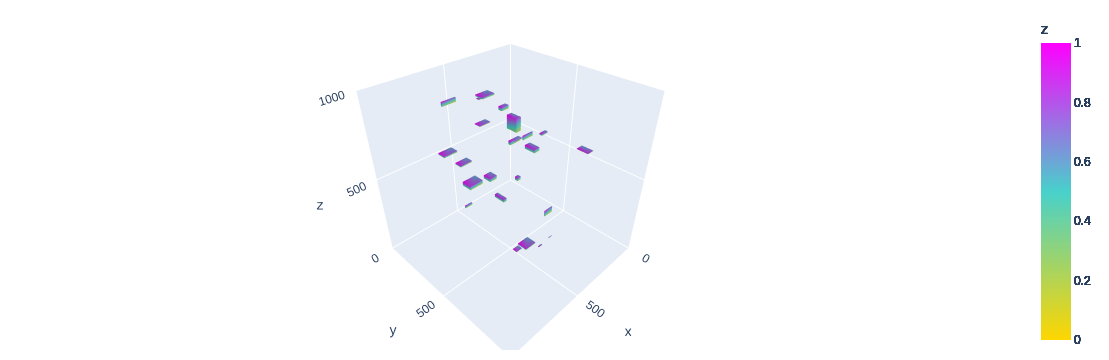

In [30]:
num_boxes_show = 100

start = perf_counter_ns()
response = requests.get(f"{boxes_url}")
end = perf_counter_ns()
response_boxes = [convert_box_json_to_nparray(box) for box in response.json()]
print(f"Response Time: {format_perf_time(end - start)}")
print(f"{len(response_boxes)} Boxes in Response")
print(f"Showing {len(response_boxes[:num_boxes_show])} Boxes")
# show_3d_boxes(response_boxes[:num_boxes_show])

In [10]:
response = requests.get(boxes_url)
response.json()[100:200]

[{'x_min': 154.0,
  'x_max': 193.0,
  'y_min': 7.0,
  'y_max': 45.0,
  'z_min': 42.0,
  'z_max': 50.0,
  'id': 'a192ea0a-03ff-4cf9-ad4d-406d2055f0e5'},
 {'x_min': 153.0,
  'x_max': 166.0,
  'y_min': 71.0,
  'y_max': 83.0,
  'z_min': 112.0,
  'z_max': 116.0,
  'id': '7004caae-7d1c-47e1-9939-c95a56c6824d'},
 {'x_min': 107.0,
  'x_max': 166.0,
  'y_min': 17.0,
  'y_max': 52.0,
  'z_min': 289.0,
  'z_max': 294.0,
  'id': '237ba854-8433-474e-897b-8c2adeaa1945'},
 {'x_min': 194.0,
  'x_max': 197.0,
  'y_min': 6.0,
  'y_max': 62.0,
  'z_min': 374.0,
  'z_max': 386.0,
  'id': 'c605ff17-f506-4b3d-a51e-8d47e7a9a77f'},
 {'x_min': 122.0,
  'x_max': 147.0,
  'y_min': 20.0,
  'y_max': 80.0,
  'z_min': 408.0,
  'z_max': 486.0,
  'id': '80faeeb8-4b7e-4527-9dd1-c6d4532f83b8'},
 {'x_min': 100.0,
  'x_max': 143.0,
  'y_min': 46.0,
  'y_max': 70.0,
  'z_min': 520.0,
  'z_max': 585.0,
  'id': 'f1455cfe-908b-481b-95c3-4d09f036310a'},
 {'x_min': 187.0,
  'x_max': 197.0,
  'y_min': 71.0,
  'y_max': 97.0,
  'z